In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet')

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/Siamese_87.jpg'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/chihuahua_126.jpg'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/german_shorthaired_97.jpg'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/Bombay_157.jpg'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/Bengal_12.jpg')]

In [7]:
fnames_str = [str(f) for f in fnames]

In [8]:
def extract_label(fname):
    import re
    pat = r'/([^/]+)_\d+.jpg$'
    m = re.search(pat, fname)
    if m:
        found = m.group(1)
    return found

In [9]:
def extract_relpath(fname):
    import re
    pat = r'(images/[^/]+_\d+.jpg)$'
    m = re.search(pat, fname)
    if m:
        found = m.group(1)
    return found

In [10]:
relpaths = [extract_relpath(f) for f in fnames_str]

In [11]:
labels = [extract_label(f) for f in fnames_str]

In [12]:
uniqueify(labels)

['Siamese',
 'chihuahua',
 'german_shorthaired',
 'Bombay',
 'Bengal',
 'japanese_chin',
 'havanese',
 'scottish_terrier',
 'yorkshire_terrier',
 'boxer',
 'keeshond',
 'english_setter',
 'american_pit_bull_terrier',
 'Maine_Coon',
 'wheaten_terrier',
 'Egyptian_Mau',
 'miniature_pinscher',
 'Abyssinian',
 'beagle',
 'great_pyrenees',
 'leonberger',
 'english_cocker_spaniel',
 'saint_bernard',
 'staffordshire_bull_terrier',
 'Birman',
 'shiba_inu',
 'Sphynx',
 'american_bulldog',
 'pug',
 'samoyed',
 'Russian_Blue',
 'Ragdoll',
 'Persian',
 'British_Shorthair',
 'pomeranian',
 'newfoundland',
 'basset_hound']

In [13]:
relpaths[:10]

['images/Siamese_87.jpg',
 'images/chihuahua_126.jpg',
 'images/german_shorthaired_97.jpg',
 'images/Bombay_157.jpg',
 'images/Bengal_12.jpg',
 'images/japanese_chin_116.jpg',
 'images/havanese_109.jpg',
 'images/scottish_terrier_122.jpg',
 'images/yorkshire_terrier_146.jpg',
 'images/boxer_176.jpg']

In [14]:
labels[:10]

['Siamese',
 'chihuahua',
 'german_shorthaired',
 'Bombay',
 'Bengal',
 'japanese_chin',
 'havanese',
 'scottish_terrier',
 'yorkshire_terrier',
 'boxer']

In [15]:
import pandas as pd
df = pd.DataFrame(list(zip(relpaths, labels)), columns=['name', 'label'])

In [16]:
df[:5]

,name,label
0,images/Siamese_87.jpg,Siamese
1,images/chihuahua_126.jpg,chihuahua
2,images/german_shorthaired_97.jpg,german_shorthaired
3,images/Bombay_157.jpg,Bombay
4,images/Bengal_12.jpg,Bengal


In [17]:
df.to_csv(path/'labels.csv', index=False)

In [18]:
def switch_labels_df(df, lab1, lab2):
    labs = df['label']
    labs = labs.map(lambda x: x.replace(lab1, 'rep1'))
    labs = labs.map(lambda x: x.replace(lab2, lab1))
    labs = labs.map(lambda x: x.replace('rep1', lab2))
    df_replaced = pd.DataFrame([df['name'], labs]).T
    return df_replaced

In [132]:
df_switched = switch_labels_df(df, 'British_Shorthair', 'Russian_Blue')

In [133]:
df_switched.to_csv(path/'switch_British_Shorthair-Russian_Blue.csv', index=False)

In [134]:
df_switched = switch_labels_df(df, 'Birman', 'Siamese')

In [135]:
df_switched.to_csv(path/'switch_Birman-Siamese.csv', index=False)

In [21]:
df_switched = switch_labels_df(df, 'american_pit_bull_terrier', 'staffordshire_bull_terrier')

In [22]:
df_switched.to_csv(path/'switch_american-staffordshire.csv', index=False)

In [20]:
df_switched = switch_labels_df(df, 'Abyssinian', 'yorkshire_terrier')

In [21]:
df_switched.to_csv(path/'switch_abyssinian-yorkshire.csv', index=False)

In [19]:
df_switched = switch_labels_df(df, 'Bengal', 'Egyptian_Mau')

In [20]:
df_switched.to_csv(path/'switch_bengal-egyptian.csv', index=False)

In [21]:
df_switched

,name,label
0,images/Siamese_87.jpg,Siamese
1,images/chihuahua_126.jpg,chihuahua
2,images/german_shorthaired_97.jpg,german_shorthaired
3,images/Bombay_157.jpg,Bombay
4,images/Bengal_12.jpg,Egyptian_Mau
...,...,...
7385,images/beagle_120.jpg,beagle
7386,images/pomeranian_10.jpg,pomeranian
7387,images/newfoundland_61.jpg,newfoundland
7388,images/British_Shorthair_21.jpg,British_Shorthair


In [56]:
df_switched[df_switched['label'] == 'Bengal']

,name,label
19,images/Egyptian_Mau_9.jpg,Bengal
91,images/Egyptian_Mau_50.jpg,Bengal
154,images/Egyptian_Mau_154.jpg,Bengal
176,images/Egyptian_Mau_11.jpg,Bengal
190,images/Egyptian_Mau_188.jpg,Bengal
...,...,...
7078,images/Egyptian_Mau_99.jpg,Bengal
7177,images/Egyptian_Mau_59.jpg,Bengal
7228,images/Egyptian_Mau_213.jpg,Bengal
7261,images/Egyptian_Mau_101.jpg,Bengal


In [57]:
df_switched[df_switched['label'] == 'Egyptian_Mau']

,name,label
4,images/Bengal_12.jpg,Egyptian_Mau
49,images/Bengal_189.jpg,Egyptian_Mau
68,images/Bengal_163.jpg,Egyptian_Mau
161,images/Bengal_183.jpg,Egyptian_Mau
163,images/Bengal_109.jpg,Egyptian_Mau
...,...,...
7101,images/Bengal_125.jpg,Egyptian_Mau
7129,images/Bengal_113.jpg,Egyptian_Mau
7190,images/Bengal_164.jpg,Egyptian_Mau
7191,images/Bengal_38.jpg,Egyptian_Mau


Populating the interactive namespace from numpy and matplotlib


/home/CW01/uia94835/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['__version__', 'random', 'subplots', 'pad', 'copy', 'array', 'partition', 'uniform']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


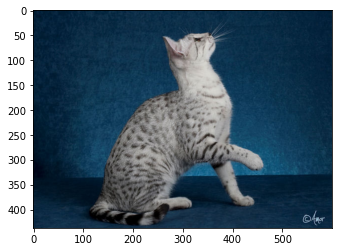

In [58]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(path/'images/Egyptian_Mau_9.jpg')
imgplot = plt.imshow(img)
plt.show()

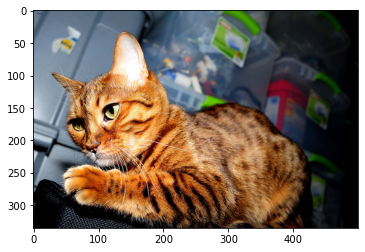

In [59]:
img=mpimg.imread(path/'images/Bengal_12.jpg')
imgplot = plt.imshow(img)
plt.show()